In [26]:
from random import seed, randrange
from math import sqrt
import pandas as pd
import numpy as np

data_folder = "/home/chandan/PycharmProjects/FraudAnomalyProject/"

data_train = pd.read_csv(data_folder+'csv_result-KDDTrain+ .csv')
data_test = pd.read_csv(data_folder+'csv_result-KDDTest+.csv')

data_train.columns = [x.strip("\'") for x in data_train.columns.values]
data_test.columns = [x.strip("\'") for x in data_test.columns.values]

df_train = data_train
df_test = data_test

for i in range(0, len(data_train.columns.values)):
    print(i, data_train.columns.values[i]) 

print('\n SHAPE:\n\t',data_train.shape)

#del df_train['id']
del df_test['id']


0 id
1 duration
2 protocol_type
3 service
4 flag
5 src_bytes
6 dst_bytes
7 land
8 wrong_fragment
9 urgent
10 hot
11 num_failed_logins
12 logged_in
13 num_compromised
14 root_shell
15 su_attempted
16 num_root
17 num_file_creations
18 num_shells
19 num_access_files
20 num_outbound_cmds
21 is_host_login
22 is_guest_login
23 count
24 srv_count
25 serror_rate
26 srv_serror_rate
27 rerror_rate
28 srv_rerror_rate
29 same_srv_rate
30 diff_srv_rate
31 srv_diff_host_rate
32 dst_host_count
33 dst_host_srv_count
34 dst_host_same_srv_rate
35 dst_host_diff_srv_rate
36 dst_host_same_src_port_rate
37 dst_host_srv_diff_host_rate
38 dst_host_serror_rate
39 dst_host_srv_serror_rate
40 dst_host_rerror_rate
41 dst_host_srv_rerror_rate
42 class

 SHAPE:
	 (125973, 43)


In [27]:
df_train.head()

,id,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,1,0,tcp,ftp_data,SF,491,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,2,0,udp,other,SF,146,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,3,0,tcp,private,S0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,4,0,tcp,http,SF,232,8153,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,5,0,tcp,http,SF,199,420,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


## Finding Co-Varience

In [28]:
df_train.cov()

,id,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
id,1.322444e+09,-1.885902e+05,3.259388e+08,1.171440e+08,1.589964e+00,6.396255e+00,1.591655e+00,352.241284,4.150049e+00,57.520671,...,-1.349420e+04,2.000886e+04,70.847709,-2.875756,4.688977,6.010943e+00,-66.651738,-6.862639e+01,2.053742e+01,2.528452e+01
duration,-1.885902e+05,6.783500e+06,1.081521e+09,3.652911e+08,-5.698581e-02,-6.514618e+00,1.433015e-01,3.948411,1.122676e+00,-81.789827,...,1.306649e+04,-3.165126e+04,-135.644072,125.076665,184.085040,-7.818772e+00,-75.238764,-7.470660e+01,1.387800e+02,1.655950e+02
src_bytes,3.259388e+08,1.081521e+09,3.446079e+13,4.812896e+09,-9.043030e+00,-1.030882e+03,-4.960613e+00,3722.506547,-5.530608e+01,-9624.436915,...,-3.372456e+06,-4.458378e+06,-17319.999754,998.278802,782.377278,-1.093517e+03,-11756.792716,-8.887372e+03,-2.642289e+03,2.334656e+04
dst_bytes,1.171440e+08,3.652911e+08,4.812896e+09,1.617061e+13,-3.925300e+00,-4.487389e+02,1.433828e+01,-2973.520229,9.168007e+01,-5691.193933,...,1.008435e+06,-1.880244e+06,-7985.975722,8380.635658,14596.752535,-5.796671e+02,-5407.938785,-5.275970e+03,1.445926e+04,1.441785e+04
land,1.589964e+00,-5.698581e-02,-9.043030e+00,-3.925300e+00,1.984174e-04,-4.502469e-06,-2.205548e-08,-0.000041,-2.426103e-07,-0.000079,...,-3.563271e-02,-2.207892e-02,0.000073,-0.000012,0.000147,1.117426e-04,0.000124,7.706385e-05,-2.255101e-05,-2.386242e-05
wrong_fragment,6.396255e+00,-6.514618e+00,-1.030882e+03,-4.487389e+02,-4.502469e-06,6.427745e-02,-2.521383e-06,-0.004638,-2.773521e-05,-0.008978,...,1.032637e+00,-1.269729e+00,-0.005547,0.002864,0.002912,-4.638040e-04,-0.005854,-6.318140e-03,2.245409e-03,-2.727952e-03
urgent,1.591655e+00,1.433015e-01,-4.960613e+00,1.433828e+01,-2.205548e-08,-2.521383e-06,2.063827e-04,0.000009,6.337031e-05,0.000051,...,-9.891763e-03,-1.255947e-02,-0.000029,0.000019,0.000012,8.370159e-06,-0.000030,-3.094960e-05,-1.320647e-05,-1.336296e-05
hot,3.522413e+02,3.948411e+00,3.722507e+03,-2.973520e+03,-4.056633e-05,-4.637543e-03,9.035942e-06,4.622364,3.613583e-04,0.122415,...,-2.612686e+00,-1.234399e+01,-0.035031,-0.004993,-0.022944,-5.981235e-03,-0.055677,-5.577959e-02,-2.013836e-02,-2.175172e-02
num_failed_logins,4.150049e+00,1.122676e+00,-5.530608e+01,9.168007e+01,-2.426103e-07,-2.773521e-05,6.337031e-05,0.000361,2.046580e-03,-0.000142,...,-1.143344e-01,-1.154508e-01,-0.000032,-0.000017,-0.000077,1.681693e-05,-0.000234,-2.479648e-04,2.587869e-04,2.508737e-04
logged_in,5.752067e+01,-8.178983e+01,-9.624437e+03,-5.691194e+03,-7.853642e-05,-8.978283e-03,5.127887e-05,0.122415,-1.424386e-04,0.239131,...,-1.945771e+01,3.379982e+01,0.132615,-0.023656,-0.024327,-3.079940e-03,-0.106898,-1.075003e-01,-4.137089e-02,-4.261740e-02


# Doing A BoxPlot

<IPython.core.display.Javascript object>


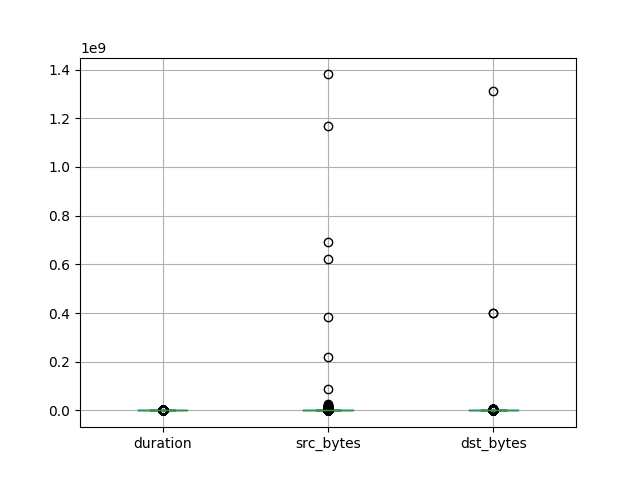

In [58]:
 df_train.boxplot(column=['duration', 'src_bytes','dst_bytes'])


# Doing Plot Scatter

<IPython.core.display.Javascript object>


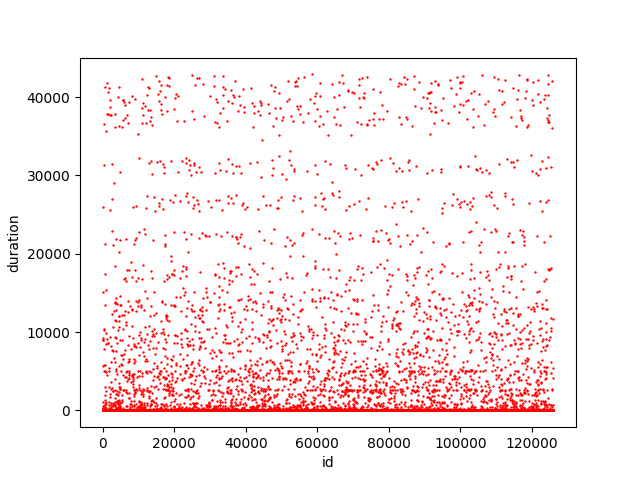

In [60]:
df_train.plot.scatter(x='id',y='duration',c='red',s=0.5)